# Demo notebook for accessing MTBS data on Azure

This notebook provides an example of accessing MTBS Burn Severity Mosiacs for CONUS and Alaska from blob storage on Azure. The data is stored in annual cloud optimized Geotiff files.

MTBS data are stored in the XYZ data center, so this notebook will run most efficiently on Azure compute located in XYZ. We recommend that substantial computation depending on MODIS data also be situated in XYZ. If you are using MTBS data for environmental science applications, consider applying for an AI for Earth grant to support your compute requirements.

#### Imports and environment

In [1]:
import xarray as xr
from adlfs import AzureBlobFileSystem

#### Listing the data files

The MTBS data on Azure is available for either the CONUS or Alaska region.

We can use `adlfs` to list the files in either region:

In [2]:
fs = AzureBlobFileSystem(account_name='carbonplan')

region = 'conus'  # conus or ak

fs.glob(f'carbonplan-data/raw/mtbs/{region}/30m/severity/*tif')[:4]

['carbonplan-data/raw/mtbs/conus/30m/severity/1984.tif',
 'carbonplan-data/raw/mtbs/conus/30m/severity/1985.tif',
 'carbonplan-data/raw/mtbs/conus/30m/severity/1986.tif',
 'carbonplan-data/raw/mtbs/conus/30m/severity/1987.tif']

#### Opening one data file

Here we demonstrate how to open a single MTBS data file using Xarray

In [3]:
da = xr.open_rasterio(
    'https://carbonplan.blob.core.windows.net/carbonplan-data/raw/mtbs/conus/30m/severity/2018.tif',
    chunks={'x': 2560, 'y': 2560}
)
da

<xarray.DataArray (band: 1, y: 70357, x: 69612)>
dask.array<open_rasterio-6b235bc99f35e608167664f4317435a0<this-array>, shape=(1, 70357, 69612), dtype=uint8, chunksize=(1, 2560, 2560), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 3.096e+06 3.096e+06 3.096e+06 ... 9.854e+05 9.854e+05
  * x        (x) float64 -2.298e+06 -2.298e+06 ... -2.102e+05 -2.101e+05
Attributes:
    transform:           (30.0, 0.0, -2298465.0, 0.0, -30.0, 3096045.0)
    crs:                 +proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=23 +lon_0=-...
    res:                 (30.0, 30.0)
    is_tiled:            1
    nodatavals:          (0.0,)
    scales:              (1.0,)
    offsets:             (0.0,)
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  NEAREST

#### A quick plot

We can select a subset of the data to make a plot over a single fire event.

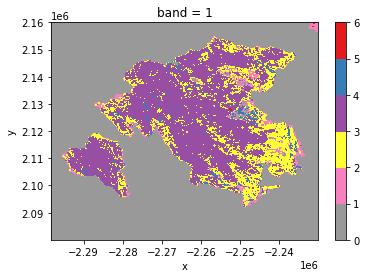

In [4]:
da.sel(band=1, y=slice(2.16e6, 2.08e6), x=slice(None, -2.23e6)).plot.contourf(cmap='Set1_r')